[https://www.geeksforgeeks.org/genetic-algorithms/]
The whole algorithm can be summarized as –  

1) Randomly initialize populations p

2) Determine fitness of population

3) Until convergence repeat:

    a) Select parents from population
   
    b) Crossover and generate new population
    
    c) Perform mutation on new population
    
    d) Calculate fitness for new population

## Setup

In [1]:
import random
import time

In [2]:
# Hyper stuff
N = 30
POPULATION_SIZE = 1000

In [3]:
GENES = list(range(1,N+1))
mutation_thresh = 0.8

In [4]:
class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.calc_fitness()
        
    @classmethod
    def mutated_genes(cls): 
        ''' 
        create random genes for mutation and g-nome construction
        '''
        gene = random.choice(GENES) 
        return gene 
  
    @classmethod
    def create_gnome(cls): 
        return [cls.mutated_genes() for _ in range(N)] 
    
    @classmethod
    def mate(cls, parent1, parent2):
        """
        Create offspring
        """
        
        child_gnome = []
        for gene1, gene2 in zip(parent1.chromosome, parent2.chromosome):
            # Probability it's from parent 1
            prob1 = random.random()
            child_gnome.append(
                gene1 if prob1 < mutation_thresh/2 else 
                (gene2 if prob1 < mutation_thresh else 
                 cls.mutated_genes()
                )
            )
            
            
        return cls(child_gnome)
    
    def calc_fitness(self):
        fitness = 0
        cols, diags, anti = {}, {}, {}
        for row, col in enumerate(self.chromosome, start=1):
            col_err = cols.get(col, 0)
            diag_err = diags.get(col-row, 0)
            anti_err = anti.get(col+row, 0)
            
            fitness += col_err + diag_err + anti_err
            
            cols[col] = cols.get(col,0) + 1
            diags[col-row] = diags.get(col-row,0) + 1
            anti[col+row] = anti.get(col+row,0) + 1
            
        return fitness

## Loop

In [5]:
elitism = 10 # %
found = False
generation = 1
population = [Individual(Individual.create_gnome()) for _ in range(POPULATION_SIZE)]

start_time = time.time()

while not found:
    population.sort(key = lambda I: I.fitness)
    if population[0].fitness == 0:
        found = True
        break
        
    new_generation = []
    
    # Perform Elitism, i.e. keep x% of fittest population 
    # goes to the next generation 
    s = int(elitism/100 * POPULATION_SIZE) 
    new_generation.extend(population[:s])

    # From 50% of fittest population, Individuals  
    # will mate to produce offspring 
    s = int((100 - elitism)/100 * POPULATION_SIZE) 
    for _ in range(s): 
        parent1 = random.choice(population[:50]) 
        parent2 = random.choice(population[:50]) 
        child = Individual.mate(parent1, parent2) 
        new_generation.append(child) 

    population = new_generation
    
    print(f"Generation: {generation}\tString: {population[0].chromosome}\tFitness: {population[0].fitness}\tTime: {time.time() - start_time}\tPopsize: {len(new_generation)}")
    generation += 1
    
print(f"Generation: {generation}\tString: {population[0].chromosome}\tFitness: {population[0].fitness}\tTime: {time.time() - start_time}")

Generation: 1	String: [13, 9, 30, 8, 6, 24, 2, 7, 14, 3, 21, 16, 5, 18, 26, 18, 4, 27, 17, 28, 16, 25, 2, 14, 29, 11, 23, 3, 11, 6]	Fitness: 18	Time: 0.09599924087524414	Popsize: 1000
Generation: 2	String: [23, 6, 28, 11, 18, 27, 20, 16, 23, 4, 1, 17, 15, 2, 8, 26, 11, 29, 10, 19, 30, 13, 2, 25, 28, 23, 1, 24, 12, 7]	Fitness: 17	Time: 0.22699928283691406	Popsize: 1000
Generation: 3	String: [29, 12, 20, 1, 28, 12, 22, 5, 8, 24, 27, 25, 7, 21, 4, 11, 22, 13, 6, 12, 4, 29, 5, 10, 18, 6, 23, 8, 17, 15]	Fitness: 16	Time: 0.3249995708465576	Popsize: 1000
Generation: 4	String: [29, 12, 20, 1, 28, 12, 22, 5, 8, 24, 27, 25, 7, 21, 4, 11, 22, 13, 6, 12, 4, 29, 5, 10, 18, 6, 23, 8, 17, 15]	Fitness: 16	Time: 0.4219996929168701	Popsize: 1000
Generation: 5	String: [29, 12, 20, 1, 28, 12, 22, 5, 8, 24, 27, 25, 7, 21, 4, 11, 22, 13, 6, 12, 4, 29, 5, 10, 18, 6, 23, 8, 17, 15]	Fitness: 16	Time: 0.5130002498626709	Popsize: 1000
Generation: 6	String: [29, 12, 20, 1, 28, 12, 22, 5, 8, 24, 27, 25, 7, 21, 4,

Generation: 50	String: [1, 6, 20, 26, 16, 11, 22, 17, 17, 2, 27, 25, 19, 12, 4, 28, 3, 13, 22, 19, 28, 5, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 8	Time: 2.9434423446655273	Popsize: 1000
Generation: 51	String: [1, 6, 20, 26, 16, 11, 22, 17, 17, 2, 27, 25, 19, 12, 4, 28, 3, 13, 22, 19, 28, 5, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 8	Time: 2.9866864681243896	Popsize: 1000
Generation: 52	String: [1, 6, 20, 26, 16, 11, 22, 17, 17, 2, 27, 25, 19, 12, 4, 28, 3, 13, 22, 19, 28, 5, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 8	Time: 3.035196542739868	Popsize: 1000
Generation: 53	String: [1, 6, 20, 26, 16, 11, 22, 17, 17, 2, 27, 25, 19, 12, 4, 28, 3, 13, 22, 19, 28, 5, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 8	Time: 3.1080985069274902	Popsize: 1000
Generation: 54	String: [1, 6, 20, 26, 16, 11, 22, 17, 17, 2, 27, 25, 19, 12, 4, 28, 3, 13, 22, 19, 28, 5, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 8	Time: 3.152097225189209	Popsize: 1000
Generation: 55	String: [1, 6, 20, 26, 16, 11, 22, 17, 17, 2, 27, 25, 19,

Generation: 98	String: [1, 6, 20, 10, 16, 29, 22, 1, 21, 2, 27, 25, 11, 19, 4, 9, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 4	Time: 5.651155710220337	Popsize: 1000
Generation: 99	String: [1, 6, 20, 10, 16, 29, 22, 1, 21, 2, 27, 25, 11, 19, 4, 9, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 4	Time: 5.684154987335205	Popsize: 1000
Generation: 100	String: [1, 6, 20, 10, 16, 29, 22, 1, 21, 2, 27, 25, 11, 19, 4, 9, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 4	Time: 5.715154647827148	Popsize: 1000
Generation: 101	String: [1, 6, 20, 10, 16, 29, 22, 1, 21, 2, 27, 25, 11, 19, 4, 9, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 4	Time: 5.773154973983765	Popsize: 1000
Generation: 102	String: [1, 6, 20, 10, 16, 29, 22, 1, 21, 2, 27, 25, 11, 19, 4, 9, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 4	Time: 5.819154262542725	Popsize: 1000
Generation: 103	String: [1, 6, 20, 10, 16, 29, 22, 1, 21, 2, 27, 25, 11, 19, 4, 9,

Generation: 150	String: [1, 6, 20, 26, 16, 29, 22, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 3	Time: 7.501189947128296	Popsize: 1000
Generation: 151	String: [1, 6, 20, 26, 16, 29, 22, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 3	Time: 7.522318363189697	Popsize: 1000
Generation: 152	String: [1, 6, 20, 26, 16, 29, 22, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 3	Time: 7.542315244674683	Popsize: 1000
Generation: 153	String: [1, 6, 20, 26, 16, 29, 22, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 3	Time: 7.563314914703369	Popsize: 1000
Generation: 154	String: [1, 6, 20, 26, 16, 29, 22, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 3	Time: 7.584315061569214	Popsize: 1000
Generation: 155	String: [1, 6, 20, 26, 16, 29, 22, 17, 21, 2, 27, 25, 

Generation: 200	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 8.794531345367432	Popsize: 1000
Generation: 201	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 8.825531244277954	Popsize: 1000
Generation: 202	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 8.862530946731567	Popsize: 1000
Generation: 203	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 8.88753056526184	Popsize: 1000
Generation: 204	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 8.915530681610107	Popsize: 1000
Generation: 205	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 1

Generation: 257	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 10.796737909317017	Popsize: 1000
Generation: 258	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 10.823736906051636	Popsize: 1000
Generation: 259	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 10.847737312316895	Popsize: 1000
Generation: 260	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 10.877737045288086	Popsize: 1000
Generation: 261	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 10.90473747253418	Popsize: 1000
Generation: 262	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 

Generation: 301	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 11.942736864089966	Popsize: 1000
Generation: 302	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 11.973737239837646	Popsize: 1000
Generation: 303	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 11.999738454818726	Popsize: 1000
Generation: 304	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 12.022736549377441	Popsize: 1000
Generation: 305	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 12.045737981796265	Popsize: 1000
Generation: 306	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27,

Generation: 348	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 13.320741891860962	Popsize: 1000
Generation: 349	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 13.343735694885254	Popsize: 1000
Generation: 350	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 13.36573576927185	Popsize: 1000
Generation: 351	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 13.391736507415771	Popsize: 1000
Generation: 352	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 13.417736291885376	Popsize: 1000
Generation: 353	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 

Generation: 398	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 14.650172472000122	Popsize: 1000
Generation: 399	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 14.674200534820557	Popsize: 1000
Generation: 400	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 14.699171543121338	Popsize: 1000
Generation: 401	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 14.727171182632446	Popsize: 1000
Generation: 402	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 14.751171827316284	Popsize: 1000
Generation: 403	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27,

Generation: 442	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 15.779172658920288	Popsize: 1000
Generation: 443	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 15.803241968154907	Popsize: 1000
Generation: 444	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 15.829172611236572	Popsize: 1000
Generation: 445	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 15.858172178268433	Popsize: 1000
Generation: 446	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 15.882171869277954	Popsize: 1000
Generation: 447	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27,

Generation: 496	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 17.086172580718994	Popsize: 1000
Generation: 497	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 17.14017128944397	Popsize: 1000
Generation: 498	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 17.162175178527832	Popsize: 1000
Generation: 499	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 17.1841721534729	Popsize: 1000
Generation: 500	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 17.20717144012451	Popsize: 1000
Generation: 501	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25,

Generation: 546	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 18.304203748703003	Popsize: 1000
Generation: 547	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 18.331169605255127	Popsize: 1000
Generation: 548	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 18.354169845581055	Popsize: 1000
Generation: 549	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 18.377169847488403	Popsize: 1000
Generation: 550	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 18.401170015335083	Popsize: 1000
Generation: 551	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27,

Generation: 591	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 19.501168966293335	Popsize: 1000
Generation: 592	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 19.528170108795166	Popsize: 1000
Generation: 593	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 19.555169105529785	Popsize: 1000
Generation: 594	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 19.580174446105957	Popsize: 1000
Generation: 595	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 19.602170705795288	Popsize: 1000
Generation: 596	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27,

Generation: 642	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 20.742168426513672	Popsize: 1000
Generation: 643	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 20.763239860534668	Popsize: 1000
Generation: 644	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 20.78520131111145	Popsize: 1000
Generation: 645	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 20.8141987323761	Popsize: 1000
Generation: 646	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 20.840245723724365	Popsize: 1000
Generation: 647	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25

Generation: 693	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 21.937354803085327	Popsize: 1000
Generation: 694	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 21.95842981338501	Popsize: 1000
Generation: 695	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 21.979355573654175	Popsize: 1000
Generation: 696	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 22.00344467163086	Popsize: 1000
Generation: 697	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 22.02441644668579	Popsize: 1000
Generation: 698	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25

Generation: 742	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 23.090434789657593	Popsize: 1000
Generation: 743	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 23.11635446548462	Popsize: 1000
Generation: 744	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 23.1423556804657	Popsize: 1000
Generation: 745	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 23.162423610687256	Popsize: 1000
Generation: 746	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 23.186424493789673	Popsize: 1000
Generation: 747	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25

Generation: 792	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 24.23340082168579	Popsize: 1000
Generation: 793	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 24.25640058517456	Popsize: 1000
Generation: 794	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 24.277408361434937	Popsize: 1000
Generation: 795	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 24.298482656478882	Popsize: 1000
Generation: 796	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 24.3193998336792	Popsize: 1000
Generation: 797	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25,

Generation: 842	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 25.350400924682617	Popsize: 1000
Generation: 843	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 25.37139916419983	Popsize: 1000
Generation: 844	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 25.390400171279907	Popsize: 1000
Generation: 845	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 25.412476778030396	Popsize: 1000
Generation: 846	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 25.43247652053833	Popsize: 1000
Generation: 847	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 2

Generation: 896	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 26.53339910507202	Popsize: 1000
Generation: 897	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 26.55447483062744	Popsize: 1000
Generation: 898	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 26.576468467712402	Popsize: 1000
Generation: 899	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 26.60047459602356	Popsize: 1000
Generation: 900	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 26.622429132461548	Popsize: 1000
Generation: 901	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25

Generation: 948	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 27.645044326782227	Popsize: 1000
Generation: 949	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 27.665043830871582	Popsize: 1000
Generation: 950	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 27.686124801635742	Popsize: 1000
Generation: 951	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 27.708044052124023	Popsize: 1000
Generation: 952	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 27.728044033050537	Popsize: 1000
Generation: 953	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27,

Generation: 1002	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 28.78804349899292	Popsize: 1000
Generation: 1003	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 28.80804204940796	Popsize: 1000
Generation: 1004	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 28.830127000808716	Popsize: 1000
Generation: 1005	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 28.85104250907898	Popsize: 1000
Generation: 1006	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 28.871042251586914	Popsize: 1000
Generation: 1007	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 

Generation: 1056	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 29.943103551864624	Popsize: 1000
Generation: 1057	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 29.96710205078125	Popsize: 1000
Generation: 1058	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 29.987102270126343	Popsize: 1000
Generation: 1059	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 30.007102489471436	Popsize: 1000
Generation: 1060	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 30.026102542877197	Popsize: 1000
Generation: 1061	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2

Generation: 1105	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 30.994102239608765	Popsize: 1000
Generation: 1106	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 31.014103889465332	Popsize: 1000
Generation: 1107	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 31.03511381149292	Popsize: 1000
Generation: 1108	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 31.057173252105713	Popsize: 1000
Generation: 1109	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 31.0801043510437	Popsize: 1000
Generation: 1110	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 

Generation: 1151	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 31.99815011024475	Popsize: 1000
Generation: 1152	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 32.020103216171265	Popsize: 1000
Generation: 1153	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 32.04010272026062	Popsize: 1000
Generation: 1154	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 32.063103675842285	Popsize: 1000
Generation: 1155	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 32.08517241477966	Popsize: 1000
Generation: 1156	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 

Generation: 1206	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 33.20218014717102	Popsize: 1000
Generation: 1207	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 33.22218036651611	Popsize: 1000
Generation: 1208	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 33.24217891693115	Popsize: 1000
Generation: 1209	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 33.2641863822937	Popsize: 1000
Generation: 1210	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 33.286179542541504	Popsize: 1000
Generation: 1211	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27

Generation: 1266	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 34.513102769851685	Popsize: 1000
Generation: 1267	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 34.53510308265686	Popsize: 1000
Generation: 1268	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 34.556113719940186	Popsize: 1000
Generation: 1269	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 34.580183029174805	Popsize: 1000
Generation: 1270	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 34.60110282897949	Popsize: 1000
Generation: 1271	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2,

Generation: 1317	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 35.621177196502686	Popsize: 1000
Generation: 1318	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 35.64210247993469	Popsize: 1000
Generation: 1319	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 35.66314458847046	Popsize: 1000
Generation: 1320	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 35.68510055541992	Popsize: 1000
Generation: 1321	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27, 25, 11, 19, 4, 30, 3, 13, 22, 7, 28, 12, 5, 18, 26, 14, 23, 8, 10, 15]	Fitness: 1	Time: 35.7081823348999	Popsize: 1000
Generation: 1322	String: [21, 24, 20, 1, 16, 29, 9, 17, 21, 2, 27

## Illustrate

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_chess_board(matrix, fontsize=50):
    n = matrix.shape[0]
    # Create a chess board (n x n) pattern
    board = np.zeros_like(matrix)
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1
    
    cmap = ListedColormap(['#769656', '#eeeed2'])
    fig, ax = plt.subplots()
    ax.imshow(board, cmap=cmap, interpolation='nearest')
    
    # Place queens based on matrix
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                ax.text(j, i, '♛', fontsize=fontsize, ha='center', va='center', color='black' if board[i, j] else 'white')
    
    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])

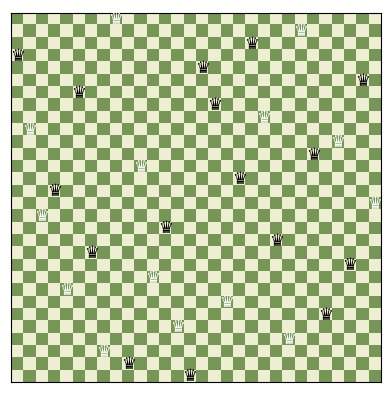

In [7]:
solution = population[0]
board = [[0] * N for _ in range(N)]
for row, col in enumerate(solution.chromosome, start=1):
    board[row-1][col-1] = 1
    
plot_chess_board(np.array(board), fontsize=12)